# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [10]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [11]:
#Cargamos las librerias necesarias para trabajar el ejercicio
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [12]:
# Crear un diccionario
# Convertir diccionario en una tabla con pandas

df = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

# Visualizo mi data con un describe para ya tener una primera impresión

df.describe()

,Age,Tardies
count,10.000000,10.000000
mean,32.900000,4.900000
std,13.698743,3.541814
min,17.000000,0.000000
25%,22.250000,2.250000
50%,28.500000,4.500000
75%,45.000000,8.250000
max,54.000000,10.000000


Draw a dispersion diagram (scatter plot) for the data.

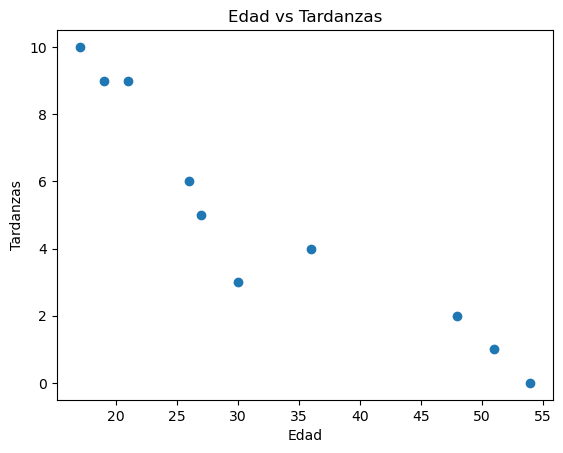

In [13]:
# Crear el scatter plot
plt.scatter(df["Age"], df["Tardies"])

# Etiquetas
plt.xlabel("Edad")
plt.ylabel("Tardanzas")
plt.title("Edad vs Tardanzas")

# Mostrar gráfico
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*----Al observar el gráfico de dispersión entre la edad de los estudiantes y el número de tardanzas, se aprecia una tendencia descendente. Esto indica una relación negativa entre ambas variables: a medida que aumenta la edad de los estudiantes, el número de tardanzas tiende a disminuir. Esta relación visual sugiere que una regresión lineal puede ser un modelo adecuado para describir la relación entre edad y tardanzas.----*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [14]:
# Covarianza
cov_matrix = df.cov()
cov_age_tardies = cov_matrix.loc["Age", "Tardies"]
print("Covarianza Edad-Tardanzas:", cov_age_tardies)
# La covarianza es negativa
# Cuando la edad aumenta, las tardanzas disminuyen. 

# Correlación
corr_matrix = df.corr()
corr_age_tardies = corr_matrix.loc["Age", "Tardies"]
print("Correlación Edad-Tardanzas:", corr_age_tardies)

# La correlación es negativa
# Indica una relación negativa fuerte: a mayor edad, menos tardanzas.
# A diferencia de la covarianza, la correlación es fácil de interpretar
# Siempre está acotada entre -1 y 1.



Covarianza Edad-Tardanzas: -45.56666666666666
Correlación Edad-Tardanzas: -0.9391626886887121


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
# Definir variables
# Variable independiente (X): Edad
X = df[["Age"]]  

# Variable dependiente (y): Tardanzas
y = df["Tardies"]  

# Comentario:
# Outcome variable (variable dependiente) = Tardies
# Tipo de regresión = Regresión lineal simple (porque solo hay una variable independiente)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X, y)

# Sacar la pendiente y el intercepto
slope = model.coef_[0]
intercept = model.intercept_

print("Pendiente (slope):", slope)
print("Intercepto (intercept):", intercept)

# Comentario:
# La pendiente nos dice cuánto cambia, en promedio, el número de tardanzas
# por cada año de aumento en la edad.
# El intercepto es el valor estimado de tardanzas cuando la edad = 0.
# Como la pendiente es negativa, confirma que a mayor edad, menos tardanzas.


Pendiente (slope): -0.2428207709159809
Intercepto (intercept): 12.888803363135771


Plot your regression model on your scatter plot.

/opt/anaconda3/envs/xgb_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


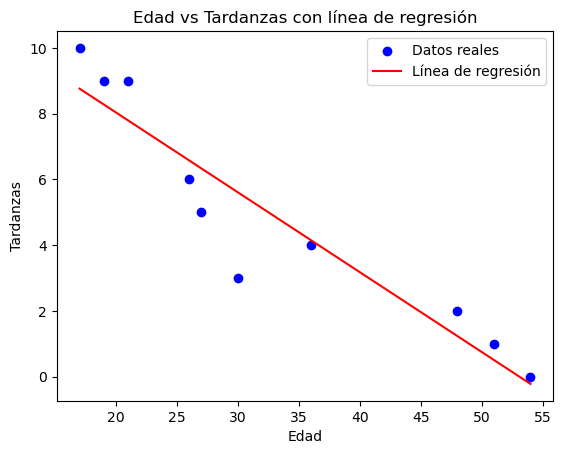

In [16]:
# Scatter plot de los datos
plt.scatter(df["Age"], df["Tardies"], color="blue", label="Datos reales")

# Crear los valores de X para la línea
X_range = np.linspace(df["Age"].min(), df["Age"].max(), 100).reshape(-1, 1)

# Predecir Y usando el modelo de regresión
y_pred = model.predict(X_range)

# Dibujar la línea de regresión
plt.plot(X_range, y_pred, color="red", label="Línea de regresión")

# Etiquetas y título
plt.xlabel("Edad")
plt.ylabel("Tardanzas")
plt.title("Edad vs Tardanzas con línea de regresión")
plt.legend()

# Mostrar gráfico
plt.show()

# Comentario:
# La línea roja muestra el ajuste del modelo de regresión lineal.
# Cada punto azul representa un estudiante real.
# La pendiente negativa de la línea confirma visualmente que a mayor edad,
# menos tardanzas, tal como habíamos observado en el scatter plot inicial.


Interpret the results of your model. What conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

- Dirección de la relación: negativa (más edad → menos tardanzas).
- Fuerza de la relación: fuerte (correlación cercana a -1).
- Predicciones: consistentes con la hipótesis.
- Confianza: razonable para datos pequeños, pero no definitiva.
- Conclusión: Edad sí influye, pero hay otros factores no medidos que también afectan.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [19]:
# Leer el archivo CSV
df_vehicles = pd.read_csv("vehicles.csv")

# Mostrar las primeras filas para ver qué columnas tenemos
df_vehicles.head()

# Comentario:
# Con esto cargamos los datos en un DataFrame y vemos qué variables hay.
# Esto nos ayudará a elegir las variables independientes para la regresión.


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [20]:
# Variables seleccionadas
X = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
y = 'CO2 Emission Grams/Mile'

# Crear un DataFrame solo con estas columnas
df_selected = df_vehicles[X + [y]]

# Mostrar las primeras filas
df_selected.head()


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [21]:
# Calcular la correlación de todas las variables con la variable outcome
correlations = df_selected.corr()[y].sort_values(ascending=False)
print(correlations)

# Comentario:
# La correlación nos dice la fuerza y dirección de la relación lineal entre cada variable
# y las emisiones de CO2. 
# Valores cercanos a 1 o -1 indican fuerte relación, valores cerca de 0 indican poca relación.


CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64


Comentarios sobre interpretación:
1. La variable con correlación más cercana a 1 o -1 será probablemente la más importante para determinar las emisiones de CO2. 
Por ejemplo, Fuel Barrels/Year, Fuel Cost/Year y Combined MPG tienen correlaciones muy fuertes con CO2.

2. La variable con correlación más cercana a 0 aporta menos información para predecir CO2.
Por ejemplo, Year puede tener menor correlación que otras variables, porque no siempre influye directamente en las emisiones sin considerar tecnología del motor u otras características.

3. Signo de la correlación:
- Positiva → al aumentar la variable, aumentan las emisiones.
- Negativa → al aumentar la variable, disminuyen las emisiones (por ejemplo, Combined MPG).


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [22]:
# Variable independiente (X): varias columnas
X = df_selected[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

# Variable dependiente (y): CO2 Emissions
y = df_selected['CO2 Emission Grams/Mile']

# Comentario:
# Outcome variable = CO2 Emission Grams/Mile
# Tipo de regresión = Regresión lineal múltiple (porque usamos varias variables independientes)


In [ ]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X, y)

# Sacar coeficientes y el intercepto
coefficients = model.coef_
intercept = model.intercept_

print("Coeficientes:", coefficients)
print("Intercepto:", intercept)

# Comentario:
# Cada coeficiente indica cuánto cambia, en promedio, el CO2 por unidad de cambio
# de la variable correspondiente, manteniendo las otras constantes.
# El intercepto es el valor estimado de CO2 si todas las variables independientes fueran 0.


Coeficientes: [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
Intercepto: 769.8882836465673


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [23]:
model = smf.ols(
    formula='Q("CO2 Emission Grams/Mile") ~ Year + Cylinders + Q("Fuel Barrels/Year") + Q("Combined MPG") + Q("Fuel Cost/Year")',
    data=df_selected
).fit()

# Imprimir el resumen de la regresión
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Q("CO2 Emission Grams/Mile")   R-squared:                       0.981
Model:                                      OLS   Adj. R-squared:                  0.981
Method:                           Least Squares   F-statistic:                 3.687e+05
Date:                          Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                                  20:31:02   Log-Likelihood:            -1.5173e+05
No. Observations:                         35952   AIC:                         3.035e+05
Df Residuals:                             35946   BIC:                         3.035e+05
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [ ]:
# INTERPRETACIÓN DEL MODELO:
#
# 1. Variables más importantes:
#    - Fuel Barrels/Year: coeficiente 19.05, p-value 0.000 → Muy significativa.
#      Esto indica que por cada barril adicional consumido por año, las emisiones de CO2
#      aumentan aproximadamente 19 gramos por milla. Es la variable más fuerte del modelo.
#    - Combined MPG: coeficiente -3.04, p-value 0.000 → Muy significativa.
#      Vehículos más eficientes (mayor MPG) reducen las emisiones de CO2.
#    - Cylinders: coeficiente 1.88, p-value 0.000 → Significativa, motores más grandes emiten más CO2.
#    - Fuel Cost/Year: coeficiente 0.032, p-value 0.000 → Significativa, refleja consumo de combustible indirectamente.
#    - Year: coeficiente -0.32, p-value 0.000 → Cada año más reciente reduce un poco las emisiones, efecto menor.
#
# 2. R-squared:
#    - 0.981 → El modelo explica el 98.1% de la variabilidad en las emisiones de CO2,
#      lo que indica un ajuste muy bueno.
#
# 3. Significancia estadística:
#    - Todos los coeficientes tienen p-value 0.000 → Altamente significativos.
#
# 4. Conclusiones:
#    - El consumo de combustible y la eficiencia del vehículo son los factores determinantes.
#    - Los motores más grandes y los vehículos más antiguos tienden a emitir más CO2.
#    - El año del vehículo tiene un efecto menor pero consistente: vehículos más nuevos emiten un poco menos.
#
# 5. Confianza en las conclusiones:
#    - Alta confianza debido al alto R-squared y a la significancia de las variables.
#    - Precaución: el "Condition Number" es muy alto (6.2e+05), lo que sugiere
#      posible multicolinealidad entre algunas variables relacionadas con consumo
#      (Fuel Barrels, Fuel Cost, MPG). Esto puede afectar la estabilidad de los coeficientes.
#
# 6. Nota sobre multicolinealidad:
#    - Variables como Fuel Barrels/Year, Combined MPG y Fuel Cost/Year están correlacionadas.
#    - Aunque el modelo ajusta muy bien, los coeficientes individuales podrían ser sensibles
#      a cambios en el dataset.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [24]:
# Datos de la fiesta
data = {
    'Invitados': [1, 3, 4, 6, 8, 9, 11, 14],
    'Asistieron': [1, 2, 4, 4, 5, 7, 8, 13]
}

# Crear DataFrame
df_party = pd.DataFrame(data)

# Mostrar el DataFrame
print(df_party)

   Invitados  Asistieron
0          1           1
1          3           2
2          4           4
3          6           4
4          8           5
5          9           7
6         11           8
7         14          13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

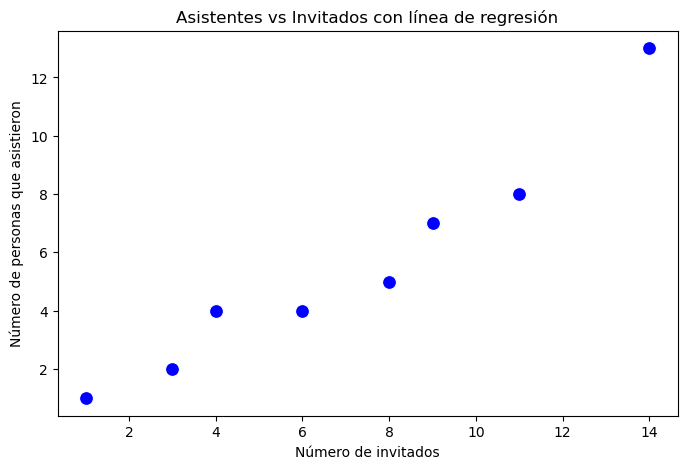

In [26]:
plt.figure(figsize=(8,5))

# Puntos reales
sns.scatterplot(x='Invitados', y='Asistieron', data=df_party, color='blue', s=100)

# Etiquetas y título
plt.xlabel('Número de invitados')
plt.ylabel('Número de personas que asistieron')
plt.title('Asistentes vs Invitados con línea de regresión')

plt.show()


In [27]:
# Ajustamos el modelo lineal simple: Asistieron ~ Invitados
model = smf.ols(formula='Asistieron ~ Invitados', data=df_party).fit()

In [28]:
# Agregar columna con valores predichos
df_party['Predicho'] = model.predict(df_party['Invitados'])

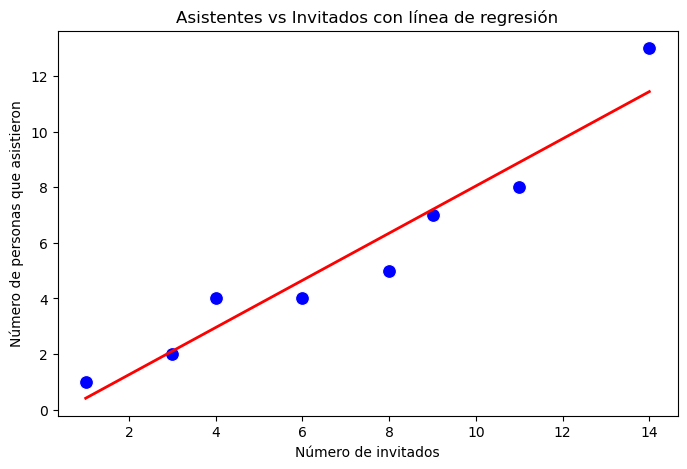

In [29]:
plt.figure(figsize=(8,5))

# Puntos reales
sns.scatterplot(x='Invitados', y='Asistieron', data=df_party, color='blue', s=100)

# Línea de regresión
sns.lineplot(x='Invitados', y='Predicho', data=df_party, color='red', linewidth=2)

# Etiquetas y título
plt.xlabel('Número de invitados')
plt.ylabel('Número de personas que asistieron')
plt.title('Asistentes vs Invitados con línea de regresión')

plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [30]:
# Mostrar resumen de la regresión lineal
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Asistieron   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           0.000102
Time:                        20:49:27   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.5

/opt/anaconda3/envs/xgb_env/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


**INTERPRETACIÓN DEL MODELO:**

1. Coeficientes:
- Intercepto: -0.4394 → Cuando no hay invitados, el modelo predice ~0 asistentes (el intercepto negativo no tiene sentido práctico, pero con pocos datos es normal).
- Invitados: 0.8485 → Por cada invitado adicional, se espera que asistan aproximadamente 0.85 personas. Esto confirma la sospecha: no todos los invitados adicionales asisten.

2. Significancia estadística:
- p-value para Invitados = 0.000 → Muy significativo.
- El intercepto no es significativo, pero no es relevante para interpretar la tendencia.

3. R-squared:
- 0.932 → El modelo explica el 93.2% de la variabilidad en el número de asistentes, lo que indica un buen ajuste considerando que solo tenemos 8 observaciones.

4. Conclusión sobre la relación:
- Hay una relación **positiva y aproximadamente lineal** entre el número de invitados y los asistentes.
- La pendiente < 1 confirma que no todos los invitados extra asisten.

5. Confianza:
- Alta confianza en la tendencia general (coeficiente significativo y R-squared alto), aunque con pocos datos (n=8) debemos ser cautelosos al generalizar.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*